# Análise de Pinguins
Este notebook carrega o dataset de pinguins, remove valores ausentes e produz visualizações básicas para explorar as medidas físicas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')
DATA_PATH = 'penguins.csv'

In [2]:
df = pd.read_csv(DATA_PATH)
initial_row_count = len(df)
df_clean = df.dropna().copy()
clean_row_count = len(df_clean)
print(f'Linhas antes da limpeza: {initial_row_count}')
print(f'Linhas depois da limpeza: {clean_row_count}')

Linhas antes da limpeza: 344
Linhas depois da limpeza: 333


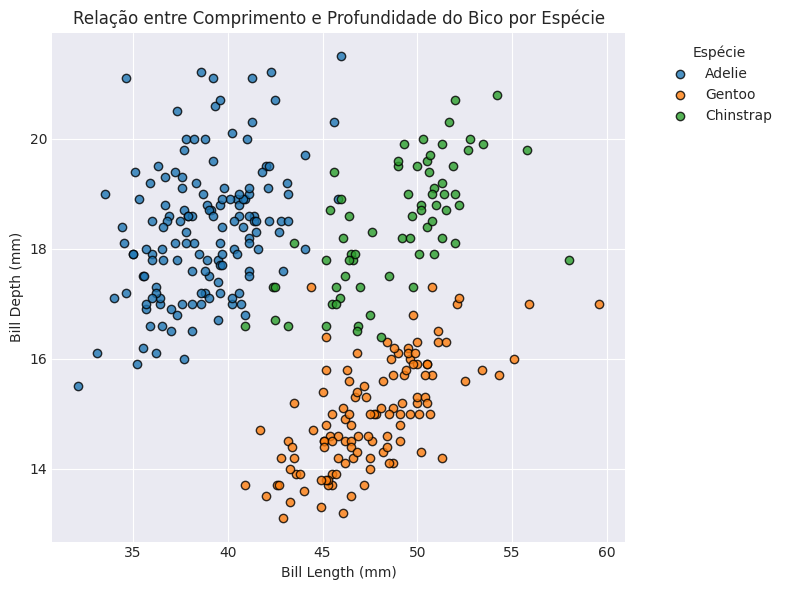

In [3]:
species_list = df_clean['species'].unique()
colors = plt.cm.tab10.colors

plt.figure(figsize=(8, 6))
for idx, species in enumerate(species_list):
    subset = df_clean[df_clean['species'] == species]
    plt.scatter(
        subset['bill_length_mm'],
        subset['bill_depth_mm'],
        label=species,
        color=colors[idx % len(colors)],
        edgecolor='black',
        alpha=0.8,
    )

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Relação entre Comprimento e Profundidade do Bico por Espécie')
plt.legend(title='Espécie', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

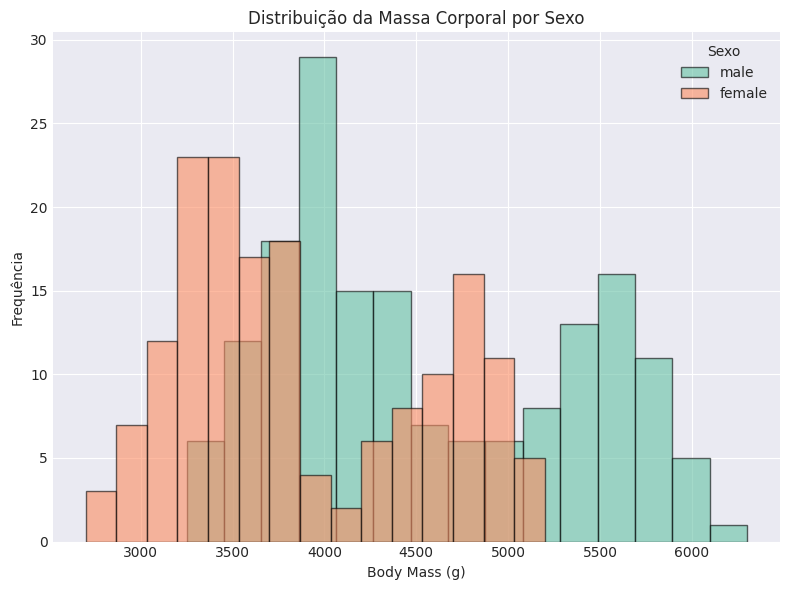

In [4]:
sex_categories = df_clean['sex'].dropna().unique()
colors = plt.cm.Set2.colors

plt.figure(figsize=(8, 6))
for idx, sex in enumerate(sex_categories):
    subset = df_clean[df_clean['sex'] == sex]['body_mass_g']
    plt.hist(
        subset,
        bins=15,
        alpha=0.6,
        label=sex,
        color=colors[idx % len(colors)],
        edgecolor='black'
    )

plt.xlabel('Body Mass (g)')
plt.ylabel('Frequência')
plt.title('Distribuição da Massa Corporal por Sexo')
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [5]:
species_body_mass = df_clean.groupby('species')['body_mass_g'].mean().reset_index()
print('Massa corporal média por espécie (g):')
print(species_body_mass)

Massa corporal média por espécie (g):
     species  body_mass_g
0     Adelie  3706.164384
1  Chinstrap  3733.088235
2     Gentoo  5092.436975
